In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numba
from numba import jit

In [3]:
def get_bayesian_k_posteriori(y_ordered, eta_prior = None, p_gamma = 1/5):
    classes, y_pos = np.unique(y_ordered, return_inverse=True)
    tau = len(y_pos)
    pi = np.zeros(tau)

    growth_prop_1 = np.ones(tau + 1)
    growth_prop_2 = np.zeros(tau + 1)
    nb_classes = len(classes)

    if eta_prior is None :
        eta = np.array([10]*nb_classes)
    else :
        eta = eta_prior

    s_alpha_prior = np.sum(eta)

    for t in range(tau):
        y_t = y_pos[t] # will also be the indice of the corresponding alpha in eta

        for i in range(t+1):
            k_tempo = i
            pi[i] = (eta[y_t] + np.sum((y_pos[:i] == y_t)*1))/(s_alpha_prior +i) # pas sur des bornes

            growth_prop_2[i + 1] = growth_prop_1[i]*pi[i]*(1-p_gamma)

        pi[0] = eta[y_t]/s_alpha_prior
        growth_prop_2[0] = np.sum(growth_prop_1)*pi[0]*p_gamma

        p_evidence = np.sum(growth_prop_2)

        growth_prop_1 = growth_prop_2/p_evidence
        growth_prop_2 = np.zeros(tau + 1)

    return growth_prop_1


In [4]:
@jit(nopython=True)
def get_bayesian_k_posteriori_jit(classes, y_pos, eta_prior = None, p_gamma = 1/5):
    tau = len(y_pos)
    pi = np.zeros(tau)

    growth_prop_1 = np.ones(tau + 1)
    growth_prop_2 = np.zeros(tau + 1)
    nb_classes = len(classes)

    if eta_prior is None :
        eta = np.array([10]*nb_classes)
    else :
        eta = eta_prior

    s_alpha_prior = np.sum(eta)

    for t in range(tau):
        y_t = y_pos[t] # will also be the indice of the corresponding alpha in eta

        for i in range(t+1):
            k_tempo = i
            pi[i] = (eta[y_t] + np.sum((y_pos[:i] == y_t)*1))/(s_alpha_prior +i) # pas sur des bornes

            growth_prop_2[i + 1] = growth_prop_1[i]*pi[i]*(1-p_gamma)

        pi[0] = eta[y_t]/s_alpha_prior
        growth_prop_2[0] = np.sum(growth_prop_1)*pi[0]*p_gamma

        p_evidence = np.sum(growth_prop_2)

        growth_prop_1 = growth_prop_2/p_evidence
        growth_prop_2 = np.zeros(tau + 1)

    return growth_prop_1


In [5]:
y = np.random.randint(8, size=4000)

In [6]:
%%time
g = get_bayesian_k_posteriori(y)

Wall time: 4min 25s


In [7]:
%%time
classes, y_pos = np.unique(y, return_inverse=True)
g = get_bayesian_k_posteriori_jit(classes, y_pos)

Wall time: 12.2 s


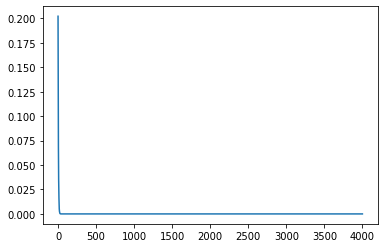

In [8]:
plt.plot(g)

In [9]:
int(np.sum(np.array(range(len(g)))*g))

3

In [10]:
np.max([np.argmax(g), 1])

1